# FLIGHT DELAY PREDICTION MACHINE LEARNING MODEL

## INTRODUCTION

The airline industry is critical in modern society, enabling travel across vast distances within short times. However, this industry is maintained by a fragile logistical ecosystem including issues such as delays, cancellations, and lost luggage. In this project, I will be analyzing flight records from Washington DC to New York to create a model predicting on the chance of a flight being delayed. This model would work not only to improve operational efficiency but also to better the airline service for society.

## 1. PROBLEM DEFINITION

This research aims to develop a machine learning model that can distinguish between on-time and delay flights using Logistic Regression, Naive Bayes, and Decision Tree algorithms.

## 2. DATA PREPARATION

### a. Data description

* Data source: The dataset, collected by United States Department of Transportation, records all flights from the Washington DC area into the New Your City area during January 2004 [Link](https://www.transtats.bts.gov/).
* Data organization: 1 CSV file organized in a long data format.
* Sample size: 2,201 observations.
* Number of features: 21 columns.
* Data duration: 2004-01-01 to 2004-01-31.

### b. Features

There are 13 features in the dataset:
* CRS_DEP_TIME: scheduled departure time
* CARRIER: the airline code (AA = American Airlines; CO = Continental Air Lines; DH = Atlantic Coast Airlines; DL = Delta Air Lines; EV = Atlantic Southeast Airlines; FL = Airtran Airways Corporation; MQ = American Eagle Airlines; OH = Comair; RU = Continental Express Airline; UA = United Air Lines; US = US Airways)
* DEP_TIME: actual departure time
* DEST: destination airport in New York City (EWR = Newark Liberty International Airport; JFK = John F. Kennedy International Airport; LGA = LaGuardia Airport)
* DISTANCE: flight distance in miles
* FL_DATE: flight date
* FL_NUM: flight number
* ORIGIN: departure airport in Washington DC (BWI = Baltimore/Washington International Thurgood Marshall Airport; DCA = Ronald Reagan Washington National Airport; IAD = Dulles International Airport)
* Weather: whether the weather was inclement (1 = Yes; 0 = No)
* DAY_WEEK: day of week (1 = Monday; 2 = Tuesday; 3 = Wednesday; 4 = Thursday; 5 = Friday, 6 = Saturday; 7 = Sunday)
* DAY_OF_MONTH: day of month
* TAIL_NUM: this number is airplane specific
* Flight Status: the flight status can be 'delayed' or 'ontime' 


## 3. DATA PROCESSING

I decide to use Python for data cleaning and data modeling because we can use Scikit-learn, which is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

Let's load some required packages for data modeling and import our dataset.

In [1]:
#Regular EDA (exploratory data analysis) and plotting libraries
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline

#Package for splitting the dataset to training set and test set
from sklearn.model_selection import train_test_split

#Package for Logistic Regression model
from sklearn.linear_model import LogisticRegression

#Package for Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

#Package for Decision Tree model
from sklearn.tree import DecisionTreeClassifier

#Package to handle imbalanced datasets
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Package for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
from dmba import classificationSummary

In [2]:
#Loading the data
raw_data = pd.read_csv('FlightDelays.csv')

### a. Data cleaning

In [3]:
#Viewing dataframe structure
raw_data.shape

(2201, 13)

There are 2201 observations of 13 features.

In [4]:
#Running the first 10 rows
raw_data.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,1/1/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,1/1/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,1/1/2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,1/1/2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,1/1/2004,7814,IAD,0,4,1,N685BR,ontime


In [5]:
#Counting the number of values in each column
raw_data.count()

CRS_DEP_TIME     2201
CARRIER          2201
DEP_TIME         2201
DEST             2201
DISTANCE         2201
FL_DATE          2201
FL_NUM           2201
ORIGIN           2201
Weather          2201
DAY_WEEK         2201
DAY_OF_MONTH     2201
TAIL_NUM         2201
Flight Status    2201
dtype: int64

In [6]:
#Checking for null values
raw_data.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64

Text(0.5, 1.0, 'Empty Data')

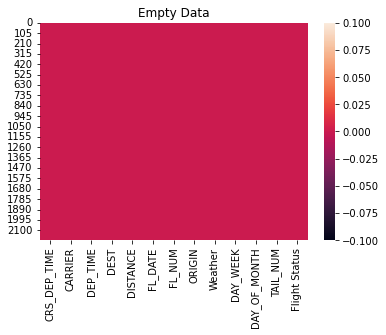

In [7]:
#Plotting null values in our dataset by using heatmap
sns.heatmap(raw_data.isnull())
plt.title("Empty Data")

There is no missing value in our dataset.

In [8]:
#Checking datatype
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


We have 6 string variables and 7 numerical variables in out dataset.

### b. Dimensional reduction

In [9]:
#Investigating all the elements whithin each feature 

for column in raw_data: #create a loop to go through all columns in our dataset
    unique_values = np.unique(raw_data[column]) #take out the unique values
    nr_values = len(unique_values) #number of unique values
    if nr_values <= 10: #if clause to print the outcomes
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature CRS_DEP_TIME is: 59
The number of values for feature CARRIER is: 8 -- ['CO' 'DH' 'DL' 'MQ' 'OH' 'RU' 'UA' 'US']
The number of values for feature DEP_TIME is: 633
The number of values for feature DEST is: 3 -- ['EWR' 'JFK' 'LGA']
The number of values for feature DISTANCE is: 7 -- [169 184 199 213 214 228 229]
The number of values for feature FL_DATE is: 31
The number of values for feature FL_NUM is: 103
The number of values for feature ORIGIN is: 3 -- ['BWI' 'DCA' 'IAD']
The number of values for feature Weather is: 2 -- [0 1]
The number of values for feature DAY_WEEK is: 7 -- [1 2 3 4 5 6 7]
The number of values for feature DAY_OF_MONTH is: 31
The number of values for feature TAIL_NUM is: 549
The number of values for feature Flight Status is: 2 -- ['delayed' 'ontime']


Based on the outcome, it can be seen that:
* The dataset is in only one month January 2004 and we have the DAY_OF_MONTH variable so we can consider removing FL_DATE.
* The 2 variables FL_NUM and TAIL_NUM do not seem like having any impact on our prediction models. 
* Additionally, we do not need DISTANCE because we already have ORIGIN and DEST and we can use these two variables to calculate distance if required. 
* Furthermore, we will be creating a new dummy variable DELAY_DEP_TIME and checking whether the DEP_TIME (actual departure time) - CRS_DEP_TIME (scheduled departure time) > 0 (YES = 1; NO = 0).

In [10]:
#Creating new DELAY_DEP_TIME column
raw_data['DELAY_DEP_TIME'] = raw_data['DEP_TIME'] - raw_data['CRS_DEP_TIME']
raw_data.loc[raw_data['DELAY_DEP_TIME'] > 0, 'DELAY_DEP_TIME'] = 1
raw_data.loc[raw_data['DELAY_DEP_TIME'] <= 0, 'DELAY_DEP_TIME'] = 0

In [11]:
#Droping unnecessary columns FL_DATE, FL_NUM, TAIL_NUM,DEP_TIME in the dataset
raw_data.drop(['FL_DATE','FL_NUM','TAIL_NUM','DEP_TIME','DISTANCE'], axis=1, inplace=True)

In [12]:
#Renaming column names
raw_data.rename(columns={'Weather': 'WEATHER', 'Flight Status': 'FLIGHT_STATUS', 'DAY_OF_MONTH': 'DAY_MONTH'}, inplace=True)

In [13]:
#Creating hourly bins departure time (original data has 100's of categories) so bining is a musthave to buildup prediction models
raw_data.CRS_DEP_TIME = [round(t / 100) for t in raw_data.CRS_DEP_TIME]

In [14]:
#Listing column names
raw_data.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEST', 'ORIGIN', 'WEATHER', 'DAY_WEEK',
       'DAY_MONTH', 'FLIGHT_STATUS', 'DELAY_DEP_TIME'],
      dtype='object')

In [15]:
#Rearranging column order
raw_data = raw_data[['CRS_DEP_TIME','DELAY_DEP_TIME', 'CARRIER', 'DEST', 'ORIGIN', 'WEATHER', 'DAY_WEEK',
       'DAY_MONTH', 'FLIGHT_STATUS']]

In [16]:
# Viewing dataset
raw_data

,CRS_DEP_TIME,DELAY_DEP_TIME,CARRIER,DEST,ORIGIN,WEATHER,DAY_WEEK,DAY_MONTH,FLIGHT_STATUS
0,15,0,OH,JFK,BWI,0,4,1,ontime
1,16,0,DH,JFK,DCA,0,4,1,ontime
2,12,0,DH,LGA,IAD,0,4,1,ontime
3,17,0,DH,LGA,IAD,0,4,1,ontime
4,10,0,DH,LGA,IAD,0,4,1,ontime
...,...,...,...,...,...,...,...,...,...
2196,6,0,RU,EWR,DCA,0,6,31,ontime
2197,17,0,RU,EWR,IAD,0,6,31,ontime
2198,16,0,RU,EWR,DCA,0,6,31,ontime
2199,14,1,RU,EWR,DCA,0,6,31,ontime


There are 2201 rows × 9 columns in our dataset. I will be transfering the cleaned dataset to csv file.

In [17]:
#Exporting to csv file
raw_data.to_csv(r'E:\Downloads\FlightDelaysTrainingData.csv', index=False)

### c. Exploratory data analysis

<AxesSubplot:xlabel='FLIGHT_STATUS', ylabel='count'>

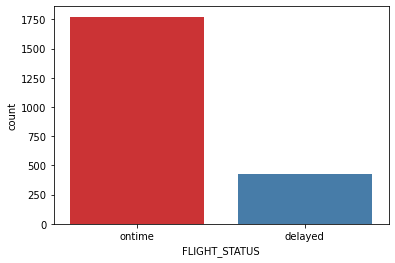

In [18]:
#Investigating the distribution of outcome variable FLIGHT_STATUS
sns.countplot(x = 'FLIGHT_STATUS', data = raw_data, palette = 'Set1')

We can see that the outcome is imbalanced between 'on time' and 'delay'. The class label 'on time' has an abnormally high number of observations compared to the class label 'delayed' (around 5 times). We're gonna solve this problem later to better the model's performance.

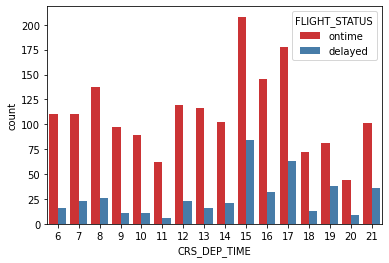

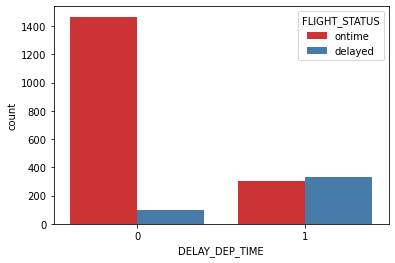

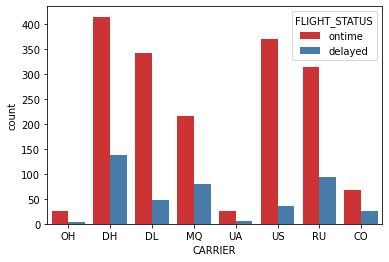

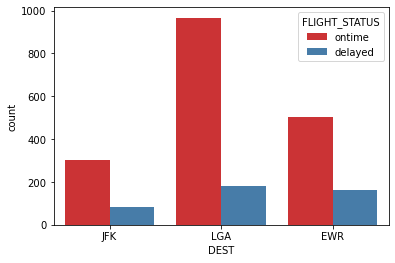

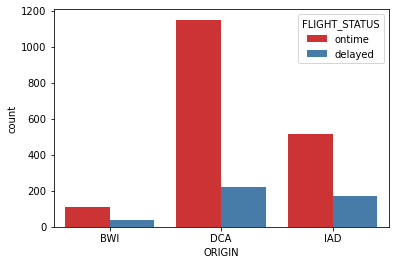

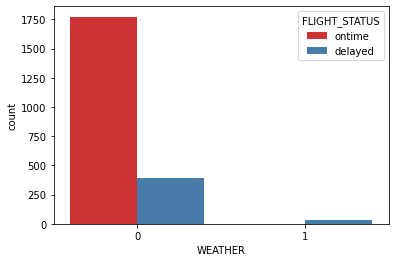

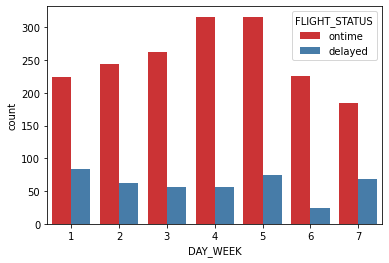

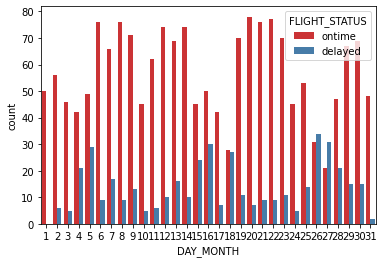

In [19]:
#Looping through all the features by our outcome variable - see if there is a relationship between predictors and outcome
features = ['CRS_DEP_TIME','DELAY_DEP_TIME', 'CARRIER', 'DEST', 'ORIGIN', 'WEATHER', 'DAY_WEEK', 'DAY_MONTH']
for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set1', hue = 'FLIGHT_STATUS')
    plt.show()

When we compare the count plot of each feature with the distribution of the outcome variable FLIGHT_STATUS. According to the shape of the distribution, we can guess that 'CRS_DEP_TIME', 'CARRIER', 'DEST', 'ORIGIN', and 'DAY_WEEK' can have greater impacts on flight delay prediction.

In [20]:
#Comparing FLIGHT_STATUS with DAY_WEEK
pd.crosstab(raw_data.DAY_WEEK, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
DAY_WEEK,,
1,84,224
2,63,244
3,57,263
4,57,315
5,75,316
6,24,226
7,68,185


Monday and Friday have the most flights delayed, on the other hand, Saturday has the least delay.

In [21]:
#Comparing FLIGHT_STATUS with CARRIER
pd.crosstab(raw_data.CARRIER, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
CARRIER,,
CO,26,68
DH,137,414
DL,47,341
MQ,80,215
OH,4,26
RU,94,314
UA,5,26
US,35,369


The three carriers having the highest numbers of delayed flights are DH, RU, and CO.

In [22]:
#Comparing FLIGHT_STATUS with WEATHER
pd.crosstab(raw_data.WEATHER, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
WEATHER,,
0,396,1773
1,32,0


When the weather is bad, the flight are going to be postponed.

In [23]:
#Comparing FLIGHT_STATUS with CRS_DEP_TIME
pd.crosstab(raw_data.CRS_DEP_TIME, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
CRS_DEP_TIME,,
6,16,110
7,23,110
8,26,138
9,11,97
10,11,89
11,6,62
12,23,119
13,16,116
14,21,102


There are more delayed flights in pm time than am time.

### d. Data balancing

In this section, we will use RandomOverSampler to balance the data.

In [24]:
#Creating X and y data matrices (X = predictor variables, y = outcome variable)
X=raw_data.drop(labels=['FLIGHT_STATUS'], axis=1)
y=raw_data['FLIGHT_STATUS']

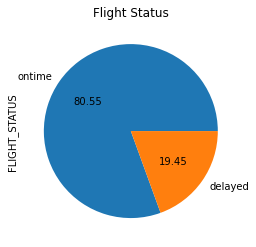

In [25]:
#Showing the piechart of the outcome variable FLIGHT_STATUS
ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Flight Status")

By plotting the distribution of outcome variable FLIGHT_STATUS, the majority class is 80.55% and the minority class is only 19.45%. When the records of the 'ontime' class are much more than the other class, our classifier may get biased towards the prediction.

In [26]:
#Handleing imbalanced data by using RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1, random_state=1) #sampling_strategy=1 means 50% for each class
X_res, y_res = ros.fit_resample(X, y)

This RandomOverSampler technique is used to upsample the minority class. 

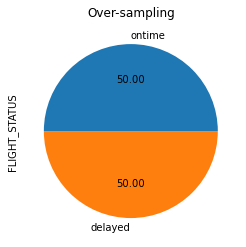

In [27]:
#Plotting the outcome of RandomOverSampler
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [28]:
# Viewing the shape of X and y
X_res.shape, y_res.shape

((3546, 8), (3546,))

Now, we have a balanced outcome with 50% of each class.

In [29]:
# Investigating all the elements whithin each feature in X_res to match them with the raw_data set
for column in X_res:
    unique_values = np.unique(X_res[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature CRS_DEP_TIME is: 16
The number of values for feature DELAY_DEP_TIME is: 2 -- [0 1]
The number of values for feature CARRIER is: 8 -- ['CO' 'DH' 'DL' 'MQ' 'OH' 'RU' 'UA' 'US']
The number of values for feature DEST is: 3 -- ['EWR' 'JFK' 'LGA']
The number of values for feature ORIGIN is: 3 -- ['BWI' 'DCA' 'IAD']
The number of values for feature WEATHER is: 2 -- [0 1]
The number of values for feature DAY_WEEK is: 7 -- [1 2 3 4 5 6 7]
The number of values for feature DAY_MONTH is: 31


The unique values in each feature still remain the same with those in the original set.

### e. Data conversion

In this section, we are going to convert categorical variables into dummy variables because some algorithms that we will use later cannot comply with non-numerical data.

In [30]:
#Converting categorical variables into numeric variables
X_dummy = pd.get_dummies(X_res, columns = features)

In [31]:
X_res.shape, X_dummy.shape

((3546, 8), (3546, 72))

In [32]:
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CRS_DEP_TIME_6    3546 non-null   uint8
 1   CRS_DEP_TIME_7    3546 non-null   uint8
 2   CRS_DEP_TIME_8    3546 non-null   uint8
 3   CRS_DEP_TIME_9    3546 non-null   uint8
 4   CRS_DEP_TIME_10   3546 non-null   uint8
 5   CRS_DEP_TIME_11   3546 non-null   uint8
 6   CRS_DEP_TIME_12   3546 non-null   uint8
 7   CRS_DEP_TIME_13   3546 non-null   uint8
 8   CRS_DEP_TIME_14   3546 non-null   uint8
 9   CRS_DEP_TIME_15   3546 non-null   uint8
 10  CRS_DEP_TIME_16   3546 non-null   uint8
 11  CRS_DEP_TIME_17   3546 non-null   uint8
 12  CRS_DEP_TIME_18   3546 non-null   uint8
 13  CRS_DEP_TIME_19   3546 non-null   uint8
 14  CRS_DEP_TIME_20   3546 non-null   uint8
 15  CRS_DEP_TIME_21   3546 non-null   uint8
 16  DELAY_DEP_TIME_0  3546 non-null   uint8
 17  DELAY_DEP_TIME_1  3546 non-null  

In [33]:
#Converting outcome variable to binary type
y_res[y_res == 'delayed'] = 1
y_res[y_res == 'ontime'] = 0
y_dummy = y_res
y_dummy = y_dummy.astype(int)

In [34]:
y_dummy.shape

(3546,)

In [35]:
y_dummy.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3546 entries, 0 to 3545
Series name: FLIGHT_STATUS
Non-Null Count  Dtype
--------------  -----
3546 non-null   int32
dtypes: int32(1)
memory usage: 14.0 KB


After conducting data balancing and data conversion, we have 72 predictors and 1 outcome variable of 3546 observations.

### e. Feature selection

There are 72 predictors, and we know that not all of those features  will play a significant role in the prediction model. Therefore, we will pick only important ones for data modelling.

In [36]:
#Running a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=1, criterion = 'entropy', max_depth = 10)
dt.fit(X_dummy,y_dummy)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [37]:
#Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(X_dummy):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for CRS_DEP_TIME_6 is : 0.009534130431644574
The feature importance for CRS_DEP_TIME_7 is : 0.015729882493374505
The feature importance for CRS_DEP_TIME_8 is : 0.014018431340882495
The feature importance for CRS_DEP_TIME_9 is : 0.0
The feature importance for CRS_DEP_TIME_10 is : 0.00843649933027166
The feature importance for CRS_DEP_TIME_11 is : 0.0
The feature importance for CRS_DEP_TIME_12 is : 0.011879824023161033
The feature importance for CRS_DEP_TIME_13 is : 0.0037658146483383016
The feature importance for CRS_DEP_TIME_14 is : 0.004244999095892444
The feature importance for CRS_DEP_TIME_15 is : 0.0017226495614333765
The feature importance for CRS_DEP_TIME_16 is : 0.01747832435027986
The feature importance for CRS_DEP_TIME_17 is : 0.007219790828597302
The feature importance for CRS_DEP_TIME_18 is : 0.009109173167632083
The feature importance for CRS_DEP_TIME_19 is : 0.009848998226676089
The feature importance for CRS_DEP_TIME_20 is : 0.01392579379336123
The 

In [38]:
#Creating a Dataframe for Feature Importance
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature_Importance'])
fi_df

,Feature,Feature_Importance
0,CRS_DEP_TIME_6,0.009534
1,CRS_DEP_TIME_7,0.015730
2,CRS_DEP_TIME_8,0.014018
3,CRS_DEP_TIME_9,0.000000
4,CRS_DEP_TIME_10,0.008436
...,...,...
67,DAY_MONTH_27,0.015050
68,DAY_MONTH_28,0.000000
69,DAY_MONTH_29,0.015543
70,DAY_MONTH_30,0.000000


In [39]:
#Filtering only feature_importance > 0
fi_df = fi_df[fi_df['Feature_Importance'] > 0].reset_index()

In [40]:
#Creating list of columns to build up the prediction model
columns_to_keep = fi_df['Feature']
columns_to_keep

0       CRS_DEP_TIME_6
1       CRS_DEP_TIME_7
2       CRS_DEP_TIME_8
3      CRS_DEP_TIME_10
4      CRS_DEP_TIME_12
5      CRS_DEP_TIME_13
6      CRS_DEP_TIME_14
7      CRS_DEP_TIME_15
8      CRS_DEP_TIME_16
9      CRS_DEP_TIME_17
10     CRS_DEP_TIME_18
11     CRS_DEP_TIME_19
12     CRS_DEP_TIME_20
13     CRS_DEP_TIME_21
14    DELAY_DEP_TIME_1
15          CARRIER_CO
16          CARRIER_DL
17          CARRIER_MQ
18          CARRIER_RU
19          CARRIER_US
20            DEST_EWR
21            DEST_JFK
22            DEST_LGA
23          ORIGIN_DCA
24           WEATHER_0
25          DAY_WEEK_1
26          DAY_WEEK_2
27          DAY_WEEK_3
28          DAY_WEEK_4
29          DAY_WEEK_5
30          DAY_WEEK_6
31          DAY_WEEK_7
32         DAY_MONTH_1
33         DAY_MONTH_3
34         DAY_MONTH_4
35         DAY_MONTH_5
36         DAY_MONTH_6
37         DAY_MONTH_8
38        DAY_MONTH_11
39        DAY_MONTH_13
40        DAY_MONTH_14
41        DAY_MONTH_15
42        DAY_MONTH_17
43        D

We just keep 50 predictors for data modelling in the following section.

## 4. DATA MODELLING

### a. Data partition

In [41]:
#Creating new X and y data matrices based on list of columns getting from feature importance 
#(X = predictor variables, y = outcome variable)
X=X_dummy[columns_to_keep]
y=y_dummy

In [42]:
X.shape,y.shape

((3546, 50), (3546,))

In [43]:
#Splitting the dataset into training set and test set, size = 0.4
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.33, random_state=1)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [44]:
train_X.shape, valid_X.shape, train_y.shape, valid_y.shape

((2375, 50), (1171, 50), (2375,), (1171,))

In [45]:
train_X.columns

Index(['CRS_DEP_TIME_6', 'CRS_DEP_TIME_7', 'CRS_DEP_TIME_8', 'CRS_DEP_TIME_10',
       'CRS_DEP_TIME_12', 'CRS_DEP_TIME_13', 'CRS_DEP_TIME_14',
       'CRS_DEP_TIME_15', 'CRS_DEP_TIME_16', 'CRS_DEP_TIME_17',
       'CRS_DEP_TIME_18', 'CRS_DEP_TIME_19', 'CRS_DEP_TIME_20',
       'CRS_DEP_TIME_21', 'DELAY_DEP_TIME_1', 'CARRIER_CO', 'CARRIER_DL',
       'CARRIER_MQ', 'CARRIER_RU', 'CARRIER_US', 'DEST_EWR', 'DEST_JFK',
       'DEST_LGA', 'ORIGIN_DCA', 'WEATHER_0', 'DAY_WEEK_1', 'DAY_WEEK_2',
       'DAY_WEEK_3', 'DAY_WEEK_4', 'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7',
       'DAY_MONTH_1', 'DAY_MONTH_3', 'DAY_MONTH_4', 'DAY_MONTH_5',
       'DAY_MONTH_6', 'DAY_MONTH_8', 'DAY_MONTH_11', 'DAY_MONTH_13',
       'DAY_MONTH_14', 'DAY_MONTH_15', 'DAY_MONTH_17', 'DAY_MONTH_19',
       'DAY_MONTH_20', 'DAY_MONTH_22', 'DAY_MONTH_23', 'DAY_MONTH_27',
       'DAY_MONTH_29', 'DAY_MONTH_31'],
      dtype='object')

### b. Logistic Regression model

In [46]:
#Fitting a logistic regression model
model1 = LogisticRegression(random_state=1,solver = 'liblinear')
model1.fit(train_X, train_y)

# SKLearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LogisticRegression(random_state=1, solver='liblinear')

In [47]:
#Printing model's coefficients model1
print('Intercept:', model1.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'Coefficients': model1.coef_[0]}))

Intercept: [0.08202405]
           Predictor  Coefficients
0     CRS_DEP_TIME_6     -0.007953
1     CRS_DEP_TIME_7      0.938899
2     CRS_DEP_TIME_8      0.130561
3    CRS_DEP_TIME_10     -0.259470
4    CRS_DEP_TIME_12     -0.304982
5    CRS_DEP_TIME_13      0.052980
6    CRS_DEP_TIME_14      0.051671
7    CRS_DEP_TIME_15      0.771983
8    CRS_DEP_TIME_16      0.498923
9    CRS_DEP_TIME_17      0.724307
10   CRS_DEP_TIME_18     -0.676650
11   CRS_DEP_TIME_19      0.956572
12   CRS_DEP_TIME_20      1.376997
13   CRS_DEP_TIME_21      0.568088
14  DELAY_DEP_TIME_1      2.795942
15        CARRIER_CO      0.146781
16        CARRIER_DL     -0.756980
17        CARRIER_MQ      0.439878
18        CARRIER_RU      0.029845
19        CARRIER_US      0.041612
20          DEST_EWR      0.167074
21          DEST_JFK     -0.138090
22          DEST_LGA      0.053040
23        ORIGIN_DCA     -0.152624
24         WEATHER_0     -1.770067
25        DAY_WEEK_1      0.281562
26        DAY_WEEK_2     -0.180

In [48]:
#Calculating accuracy on training set
print("The Training Accuracy is: ", model1.score(train_X, train_y))

#Calculating accuracy on valid set
print("The Testing Accuracy is: ", model1.score(valid_X, valid_y))

The Training Accuracy is:  0.8050526315789474
The Testing Accuracy is:  0.8010247651579846


In [49]:
#Showing training set confusion matrix
classificationSummary(train_y, model1.predict(train_X))

Confusion Matrix (Accuracy 0.8051)

       Prediction
Actual   0   1
     0 983 198
     1 265 929


In [50]:
#Showing valid set confusion matrix
classificationSummary(valid_y, model1.predict(valid_X))

Confusion Matrix (Accuracy 0.8010)

       Prediction
Actual   0   1
     0 500  92
     1 141 438


In [51]:
#Creating Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

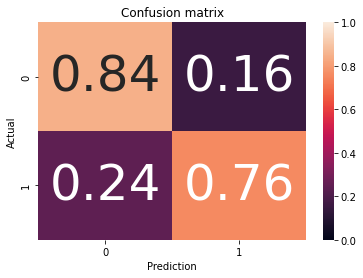

In [52]:
#Plotting Confusion Matrix
cm1 = confusion_matrix(valid_y, model1.predict(valid_X))
cm1_norm = cm1 / cm1.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm1_norm, classes = model1.classes_, title='Confusion matrix')

In [53]:
cm1

array([[500,  92],
       [141, 438]], dtype=int64)

In [54]:
cm1.sum(axis=1)

array([592, 579], dtype=int64)

In [55]:
np.diag(cm1)

array([500, 438], dtype=int64)

In [56]:
#Calculating True Positive Rate and True Negative Rate
TP1 = np.diag(cm1)
FN1 = cm1.sum(axis=1) - np.diag(cm1)
TPR1 = TP1 / (TP1 + FN1)

print("The True Positive Rate and True Negative Rate of the valid set are:", TPR1)

The True Positive Rate and True Negative Rate of the valid set are: [0.84459459 0.75647668]


### c. Naïve Bayes model

In [57]:
#Fitting a Naïve Bayes model
model2 = MultinomialNB(alpha=0.01)
model2.fit(train_X, train_y)

# SKLearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

MultinomialNB(alpha=0.01)

In [58]:
#Calculating accuracy on training set
print("The Training Accuracy is: ", model2.score(train_X, train_y))

#Calculating accuracy on valid set
print("The Testing Accuracy is: ", model2.score(valid_X, valid_y))

The Training Accuracy is:  0.7629473684210526
The Testing Accuracy is:  0.7574722459436379


In [59]:
#Showing training set confusion matrix
classificationSummary(train_y, model2.predict(train_X))

Confusion Matrix (Accuracy 0.7629)

       Prediction
Actual   0   1
     0 882 299
     1 264 930


In [60]:
#Showing valid set confusion matrix
classificationSummary(valid_y, model2.predict(valid_X))

Confusion Matrix (Accuracy 0.7575)

       Prediction
Actual   0   1
     0 446 146
     1 138 441


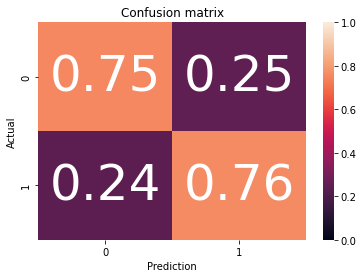

In [61]:
#Plotting Confusion Matrix
cm2 = confusion_matrix(valid_y, model2.predict(valid_X))
cm2_norm = cm2 / cm2.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm2_norm, classes = model2.classes_, title='Confusion matrix')

In [62]:
cm2

array([[446, 146],
       [138, 441]], dtype=int64)

In [63]:
cm2.sum(axis=1)

array([592, 579], dtype=int64)

In [64]:
np.diag(cm2)

array([446, 441], dtype=int64)

In [65]:
#Calculating True Positive Rate and True Negative Rate
TP2 = np.diag(cm2)
FN2 = cm2.sum(axis=1) - np.diag(cm2)
TPR2 = TP2 / (TP2 + FN2)

print("The True Positive Rate and True Negative Rate of the valid set are:", TPR2)

The True Positive Rate and True Negative Rate of the valid set are: [0.75337838 0.76165803]


### d. Decision Tree model

In [66]:
# Fitting a decision tree model
model3 = DecisionTreeClassifier(random_state=1, criterion = 'gini', max_depth = 10)
model3.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [67]:
#Calculating accuracy on training set
print("The Training Accuracy is: ", model3.score(train_X, train_y))

#Calculating accuracy on valid set
print("The Testing Accuracy is: ", model3.score(valid_X, valid_y))

The Training Accuracy is:  0.8736842105263158
The Testing Accuracy is:  0.8497011101622545


In [68]:
#Showing training set confusion matrix
classificationSummary(train_y, model3.predict(train_X))

Confusion Matrix (Accuracy 0.8737)

       Prediction
Actual    0    1
     0 1067  114
     1  186 1008


In [69]:
#Showing valid set confusion matrix
classificationSummary(valid_y, model3.predict(valid_X))

Confusion Matrix (Accuracy 0.8497)

       Prediction
Actual   0   1
     0 528  64
     1 112 467


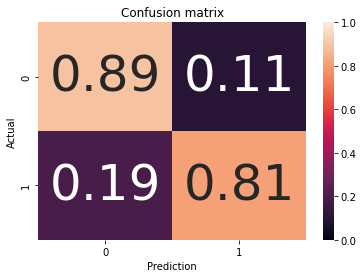

In [70]:
#Plotting Confusion Matrix
cm3 = confusion_matrix(valid_y, model3.predict(valid_X))
cm3_norm = cm3 / cm3.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm3_norm, classes = model3.classes_, title='Confusion matrix')

In [71]:
cm3

array([[528,  64],
       [112, 467]], dtype=int64)

In [72]:
cm3.sum(axis=1)

array([592, 579], dtype=int64)

In [73]:
np.diag(cm3)

array([528, 467], dtype=int64)

In [74]:
#Calculating True Positive Rate and True Negative Rate
TP3 = np.diag(cm3)
FN3 = cm3.sum(axis=1) - np.diag(cm3)
TPR3 = TP3 / (TP3 + FN3)

print("The True Positive Rate and True Negative Rate of the valid set are:", TPR3)

The True Positive Rate and True Negative Rate of the valid set are: [0.89189189 0.80656304]


### e. Model comparison

Based on accuracy score, true positive rate, and true negative rate, model3 which is built by using decision tree model (50 predictors) is the optimal solution for flight delay prediction.

## 5. MODEL IMPLEMENTATION

In the previous chapter, we have already created 3 models and also picked the decision tree model as the optimal one. Moving on, to put this model into use, we are going to classify 10 observations in the FlightDelaysTestingData file.

In [75]:
#Loading the FlightDelaysTestingData dataset
test_data = pd.read_csv('FlightDelaysTestingData.csv')

In [76]:
#Viewing dataset
test_data

,CRS_DEP_TIME,DELAY_DEP_TIME,CARRIER,DEST,ORIGIN,WEATHER,DAY_WEEK,DAY_MONTH
0,7,0,AA,JFK,BWI,1,2,5
1,9,1,CO,EWR,DCA,1,4,13
2,10,0,DH,LGA,IAD,0,5,25
3,15,1,DL,LGA,DCA,0,7,10
4,12,0,EV,EWR,IAD,0,6,9
5,8,0,US,JFK,BWI,0,3,30
6,9,0,AA,JFK,BWI,1,1,17
7,18,0,CO,LGA,DCA,1,1,12
8,21,1,US,EWR,IAD,0,3,22
9,22,0,RU,EWR,IAD,0,7,31


We can see that the test_data has a different structure from the X dataset, which is used to build up the decision tree model. Therefore, we will be doing some data transformation that makes the test_data set can fit into our designated model.

In [77]:
#Transforming test_data variables to a dataframe of dummy variables
new_test_data = pd.get_dummies(test_data, columns = features)

In [78]:
#Viewing dataset
new_test_data

,CRS_DEP_TIME_7,CRS_DEP_TIME_8,CRS_DEP_TIME_9,CRS_DEP_TIME_10,CRS_DEP_TIME_12,CRS_DEP_TIME_15,CRS_DEP_TIME_18,CRS_DEP_TIME_21,CRS_DEP_TIME_22,DELAY_DEP_TIME_0,...,DAY_MONTH_5,DAY_MONTH_9,DAY_MONTH_10,DAY_MONTH_12,DAY_MONTH_13,DAY_MONTH_17,DAY_MONTH_22,DAY_MONTH_25,DAY_MONTH_30,DAY_MONTH_31
0,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [79]:
#Merging X_test_data to valid_X
X_test_data = pd.DataFrame(valid_X.append(new_test_data))

C:\Users\Admin\AppData\Local\Temp\ipykernel_11016\807650965.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test_data = pd.DataFrame(valid_X.append(new_test_data))


In [80]:
#Viewing column names
X_test_data.columns

Index(['CRS_DEP_TIME_6', 'CRS_DEP_TIME_7', 'CRS_DEP_TIME_8', 'CRS_DEP_TIME_10',
       'CRS_DEP_TIME_12', 'CRS_DEP_TIME_13', 'CRS_DEP_TIME_14',
       'CRS_DEP_TIME_15', 'CRS_DEP_TIME_16', 'CRS_DEP_TIME_17',
       'CRS_DEP_TIME_18', 'CRS_DEP_TIME_19', 'CRS_DEP_TIME_20',
       'CRS_DEP_TIME_21', 'DELAY_DEP_TIME_1', 'CARRIER_CO', 'CARRIER_DL',
       'CARRIER_MQ', 'CARRIER_RU', 'CARRIER_US', 'DEST_EWR', 'DEST_JFK',
       'DEST_LGA', 'ORIGIN_DCA', 'WEATHER_0', 'DAY_WEEK_1', 'DAY_WEEK_2',
       'DAY_WEEK_3', 'DAY_WEEK_4', 'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7',
       'DAY_MONTH_1', 'DAY_MONTH_3', 'DAY_MONTH_4', 'DAY_MONTH_5',
       'DAY_MONTH_6', 'DAY_MONTH_8', 'DAY_MONTH_11', 'DAY_MONTH_13',
       'DAY_MONTH_14', 'DAY_MONTH_15', 'DAY_MONTH_17', 'DAY_MONTH_19',
       'DAY_MONTH_20', 'DAY_MONTH_22', 'DAY_MONTH_23', 'DAY_MONTH_27',
       'DAY_MONTH_29', 'DAY_MONTH_31', 'CRS_DEP_TIME_9', 'CRS_DEP_TIME_22',
       'DELAY_DEP_TIME_0', 'CARRIER_AA', 'CARRIER_DH', 'CARRIER_EV',
       

In [81]:
#Dropping columns not in the model3
X_test_data.drop(['CRS_DEP_TIME_9', 'CRS_DEP_TIME_22',
       'DELAY_DEP_TIME_0', 'CARRIER_AA', 'CARRIER_DH', 'CARRIER_EV',
       'ORIGIN_BWI', 'ORIGIN_IAD', 'WEATHER_1', 'DAY_MONTH_9', 'DAY_MONTH_10',
       'DAY_MONTH_12', 'DAY_MONTH_25', 'DAY_MONTH_30'], axis=1, inplace=True)

In [82]:
#Keeping only the 10 new observations
X_test_data = pd.DataFrame(X_test_data.tail(10))

In [83]:
#Replacing nan values by 0
X_test_data = X_test_data.replace(np.nan, 0)
X_test_data = X_test_data.astype(int)

In [84]:
#Checking datatype of all predictors
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CRS_DEP_TIME_6    10 non-null     int32
 1   CRS_DEP_TIME_7    10 non-null     int32
 2   CRS_DEP_TIME_8    10 non-null     int32
 3   CRS_DEP_TIME_10   10 non-null     int32
 4   CRS_DEP_TIME_12   10 non-null     int32
 5   CRS_DEP_TIME_13   10 non-null     int32
 6   CRS_DEP_TIME_14   10 non-null     int32
 7   CRS_DEP_TIME_15   10 non-null     int32
 8   CRS_DEP_TIME_16   10 non-null     int32
 9   CRS_DEP_TIME_17   10 non-null     int32
 10  CRS_DEP_TIME_18   10 non-null     int32
 11  CRS_DEP_TIME_19   10 non-null     int32
 12  CRS_DEP_TIME_20   10 non-null     int32
 13  CRS_DEP_TIME_21   10 non-null     int32
 14  DELAY_DEP_TIME_1  10 non-null     int32
 15  CARRIER_CO        10 non-null     int32
 16  CARRIER_DL        10 non-null     int32
 17  CARRIER_MQ        10 non-null     int3

In [85]:
#Viewing dataset
X_test_data

,CRS_DEP_TIME_6,CRS_DEP_TIME_7,CRS_DEP_TIME_8,CRS_DEP_TIME_10,CRS_DEP_TIME_12,CRS_DEP_TIME_13,CRS_DEP_TIME_14,CRS_DEP_TIME_15,CRS_DEP_TIME_16,CRS_DEP_TIME_17,...,DAY_MONTH_14,DAY_MONTH_15,DAY_MONTH_17,DAY_MONTH_19,DAY_MONTH_20,DAY_MONTH_22,DAY_MONTH_23,DAY_MONTH_27,DAY_MONTH_29,DAY_MONTH_31
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
#Using the optimal model to predict X_test_data
model3.predict(X_test_data)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

Outcome: 'ontime', 'delay', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'delay', 'ontime'.

## CONCLUSION

The model with the highest accuracy is model 3, which is constructed by decision tree algorithms using 50 binary predictors. The model accuracy on the valid set is 84.97% while the true positive rate and true negative rate of the valid set are 0.8919 and 0.8066. These numbers mean that the predicted values for 'on time' match with the actual values by 89.19% and that ratio for the 'delayed' class is 80.66%.

## REFERENCES

* Five Techniques to Handle Imbalanced Data For a Classification Problem. [Link](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#:~:text=Imbalanced%20data%20refers%20to%20those,dataset%20handling%20with%20an%20example)
* How to handle imbalanced datasets. [Link](https://github.com/dataprofessor/imbalanced-data/blob/main/imbalanced_learn.ipynb)
* Introduction to Machine Learning - Logistic Regression Example. [Link](https://github.com/Pitsillides91/Python-Tutorials/blob/master/Introduction%20to%20ML%20-%20Logistic%20Regression%20Example/Introduction%20to%20Machine%20Learning%20-%20Logistic%20Regression%20Example%20(Complete).ipynb)